In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
pattern = re.compile(r"name:'(.*?)',\s+geoCoord:\[(.*?),\s(.*?)\]")

In [4]:
city_location = {}
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [5]:
city_location

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '台湾': (121.3, 25.03),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '海口': (110.35, 20.02),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '西藏': (91.11, 29.97),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [6]:
import math 
def geo_distance(origin, destination):
    
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [7]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [8]:
get_geo_distance('北京', '西安')

868.6681437311302

In [11]:
import networkx as nx
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))

In [15]:
%matplotlib inline
import matplotlib

In [16]:
import matplotlib.pyplot as plt

In [17]:
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
matplotlib.rcParams['font.serif'] = 'Arial Unicode MS'
matplotlib.rcParams['font.sans-serif'] = 'Arial Unicode MS'
matplotlib.rcParams['axes.unicode_minus'] = False


/Users/junl/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/junl/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/junl/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/junl/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

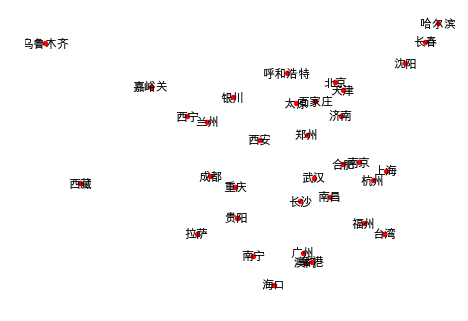

In [21]:
nx.draw(city_graph, city_location, with_labels=True, node_size=20)

In [23]:
from collections import defaultdict
city_connection = defaultdict(list)
threshold = 300
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [24]:
city_connection

defaultdict(list,
            {'上海': ['杭州', '杭州'],
             '兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '南京': ['合肥', '杭州', '合肥', '杭州'],
             '南宁': ['贵阳', '海口', '贵阳', '海口'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '台湾': ['福州', '福州'],
             '合肥': ['济南', '南京', '济南', '南京', '南昌', '南昌'],
             '呼和浩特': ['太原', '太原'],
             '哈尔滨': ['长春', '长春'],
             '天津': ['济南', '北京', '济南', '北京'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '广州': ['长沙', '香港', '澳门', '长沙', '香港', '澳门'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '杭州': ['南京', '南京', '福州', '上海', '福州', '上海'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '沈阳': ['长春', '长春'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '海口': ['南宁', '南宁'],
         

In [25]:
city_with_road = nx.Graph(city_connection)

/Users/junl/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/junl/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/junl/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/junl/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

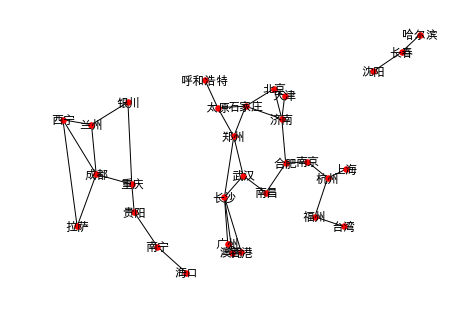

In [26]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [27]:
simple_connection_info = defaultdict(list)

In [29]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [30]:
simple_connection_info.update(simple_connection_info_src)

In [31]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] 
            visited = [successor] + visited 
            
            # 顺序决定深度还是广度，后来pop的
    
        d.add(froninter)
    
    return seen

In [36]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})
bfs(number_grpah, 1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [33]:
simple_connection_info['西安']

['兰州', '长沙']

/Users/junl/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/junl/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/junl/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/junl/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

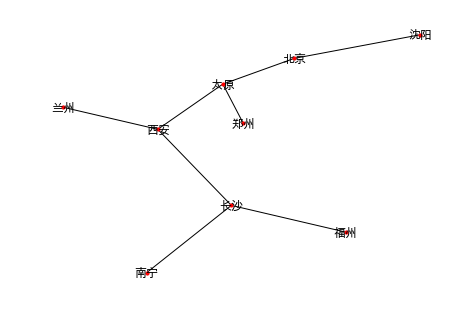

In [34]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

In [39]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    visitied = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes)        
            
        

In [40]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [41]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [42]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [43]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [45]:
search('北京', '南京', city_connection, transfer_stations_first)

['北京', '济南', '合肥', '南京']

In [46]:
search('北京', '南京', city_connection, transfer_as_much_possible)

['北京', '石家庄', '郑州', '武汉', '南昌', '合肥', '南京']

In [47]:
search('北京', '南京', city_connection, shortest_path_first)

['北京', '济南', '合肥', '南京']

# Machine Learning

In [48]:
from sklearn.datasets import load_boston
data = load_boston()
X, Y = data['data'], data['target']

In [49]:
X[1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [50]:
Y[1]

21.600000000000001

In [53]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], Y)

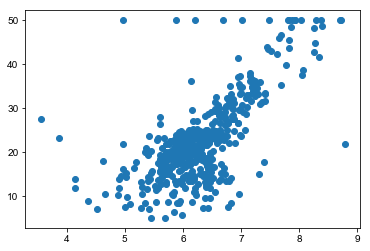

In [54]:
draw_rm_and_price()

In [55]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

In [56]:
import random

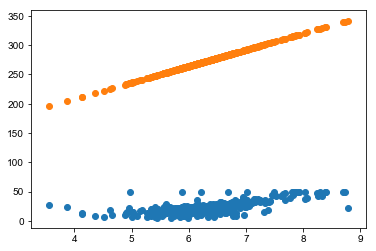

In [59]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [60]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [62]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(Y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -73.58414891947334 best_b: -50.703835800842015, and the loss is: 290371.7798182535
When time is : 1, get best_k: 17.68369483227967 best_b: 47.61965395982162, and the loss is: 18636.427835148617
When time is : 3, get best_k: -14.551292834258447 best_b: -14.4089759420158, and the loss is: 16803.59092390012
When time is : 14, get best_k: -11.795113996978344 best_b: 0.22481549186900907, and the loss is: 9558.65384402096
When time is : 28, get best_k: 13.396928861826126 best_b: 6.004153912171262, and the loss is: 4631.3960541336655
When time is : 31, get best_k: 3.310896822697032 best_b: -55.615906364371085, and the loss is: 3348.1076495094253
When time is : 39, get best_k: 5.753709036523745 best_b: 19.3018883913942, and the loss is: 1133.4462009601152
When time is : 44, get best_k: 18.435819812832463 best_b: -78.60582413307597, and the loss is: 303.3122626900556
When time is : 53, get best_k: 16.269470551212677 best_b: -87.99391627570535, and the loss is: 137.

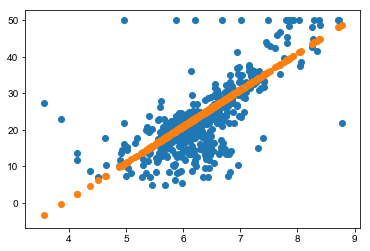

In [67]:
X_rm = X[:, 5]
k = 10
b = -39
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [72]:
# 2nd-Method： direction adjusting
trying_times = 5000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(Y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: -45.3904495317634 best_b: -67.91342046225532, and the loss is: 142663.58611062804
When time is : 1, get best_k: -45.2904495317634 best_b: -67.81342046225532, and the loss is: 142111.37208468144
When time is : 2, get best_k: -45.1904495317634 best_b: -67.71342046225533, and the loss is: 141560.22923060218
When time is : 3, get best_k: -45.0904495317634 best_b: -67.61342046225533, and the loss is: 141010.15754839047
When time is : 4, get best_k: -44.990449531763396 best_b: -67.51342046225534, and the loss is: 140461.15703804602
When time is : 5, get best_k: -44.890449531763394 best_b: -67.41342046225535, and the loss is: 139913.22769956928
When time is : 6, get best_k: -44.79044953176339 best_b: -67.31342046225535, and the loss is: 139366.3695329597
When time is : 7, get best_k: -44.69044953176339 best_b: -67.21342046225536, and the loss is: 138820.5825382178
When time is : 8, get best_k: -44.59044953176339 best_b: -67.11342046225536, and the loss is: 138275

When time is : 170, get best_k: -28.39044953176316 best_b: -50.91342046225535, and the loss is: 64174.585575894
When time is : 171, get best_k: -28.29044953176316 best_b: -50.81342046225535, and the loss is: 63804.47076741717
When time is : 172, get best_k: -28.190449531763157 best_b: -50.71342046225535, and the loss is: 63435.42713080786
When time is : 173, get best_k: -28.090449531763156 best_b: -50.61342046225535, and the loss is: 63067.45466606602
When time is : 174, get best_k: -27.990449531763154 best_b: -50.51342046225535, and the loss is: 62700.55337319172
When time is : 175, get best_k: -27.890449531763153 best_b: -50.413420462255345, and the loss is: 62334.723252184725
When time is : 176, get best_k: -27.79044953176315 best_b: -50.313420462255344, and the loss is: 61969.96430304538
When time is : 177, get best_k: -27.69044953176315 best_b: -50.21342046225534, and the loss is: 61606.27652577332
When time is : 178, get best_k: -27.59044953176315 best_b: -50.11342046225534, and 

When time is : 415, get best_k: -3.8904495317630277 best_b: -26.413420462255004, and the loss is: 5513.7846177732235
When time is : 416, get best_k: -3.7904495317630276 best_b: -26.313420462255003, and the loss is: 5406.10691682669
When time is : 417, get best_k: -3.6904495317630275 best_b: -26.213420462255, and the loss is: 5299.500387747632
When time is : 418, get best_k: -3.5904495317630274 best_b: -26.113420462255, and the loss is: 5193.965030536039
When time is : 419, get best_k: -3.4904495317630273 best_b: -26.013420462255, and the loss is: 5089.500845191908
When time is : 420, get best_k: -3.390449531763027 best_b: -25.913420462254997, and the loss is: 4986.107831715252
When time is : 421, get best_k: -3.290449531763027 best_b: -25.813420462254996, and the loss is: 4883.785990106076
When time is : 422, get best_k: -3.190449531763027 best_b: -25.713420462254994, and the loss is: 4782.535320364369
When time is : 423, get best_k: -3.090449531763027 best_b: -25.613420462254993, and 

In [66]:
loss([1, 1, 1], [2, 2, 3])

2.0

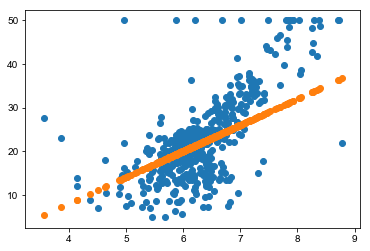

In [73]:
X_rm = X[:, 5]
k = 6
b = -16
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$